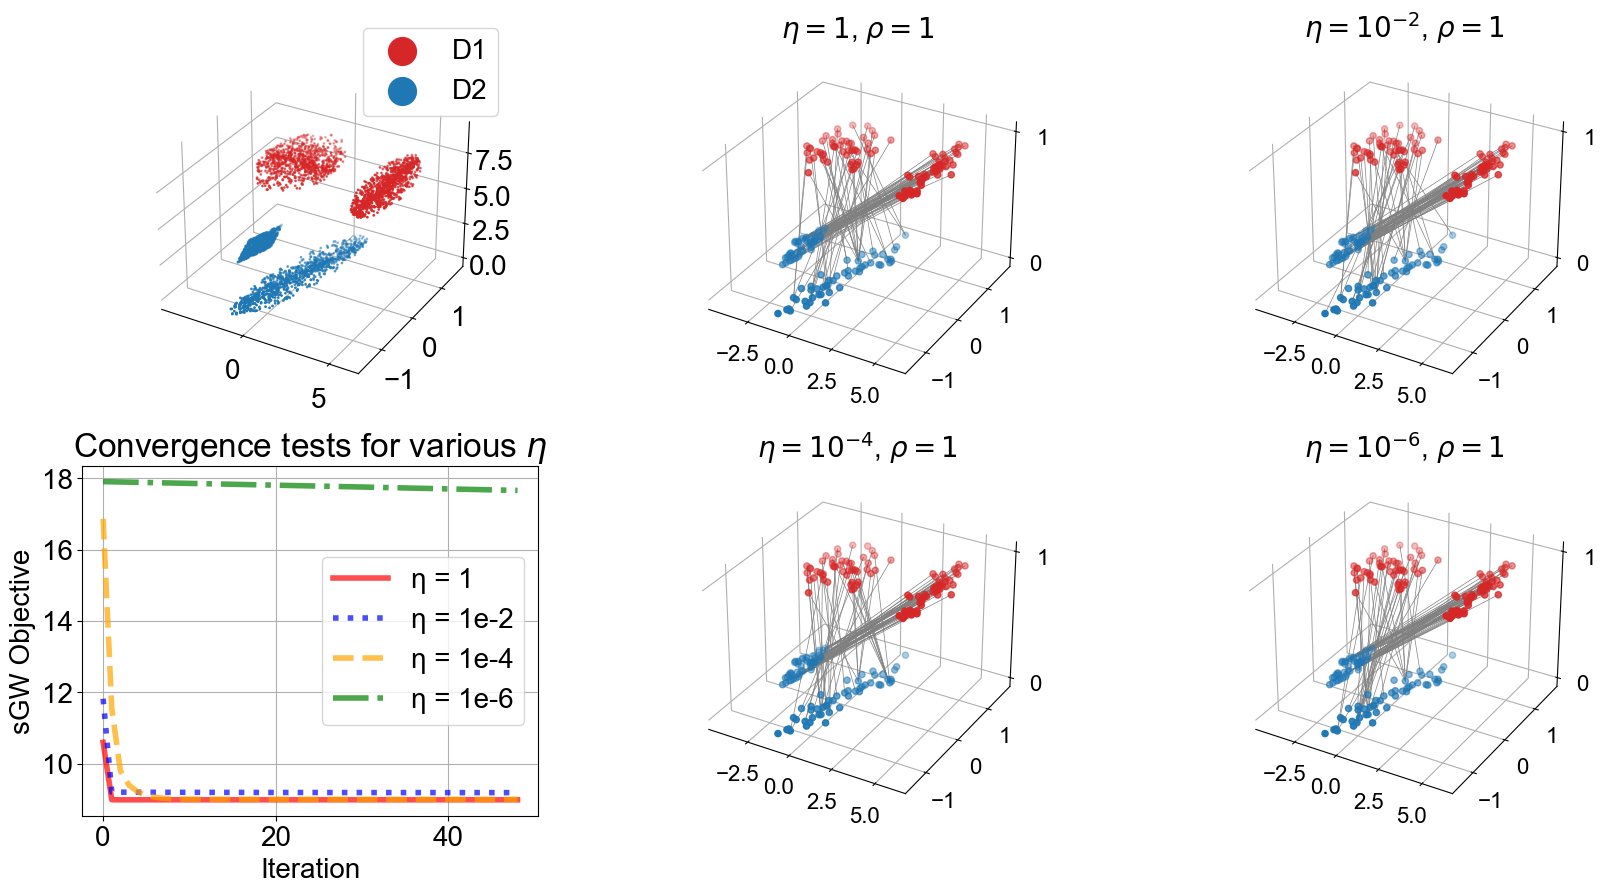

In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import matplotlib.patches as mpatches
from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import sgw
import networkx as nx
import matplotlib as mpl
mpl.rcParams['font.size']=20
mpl.rcParams['font.sans-serif'] = "Arial"


random_state=1
np.random.seed(random_state) 
fig = plt.figure(figsize=(20, 10), facecolor='white')







def generate_data(nsample, ratio):
    # Generate first ellipse
    s = np.random.uniform(size=(nsample, 3))
    x1 = np.zeros_like(s)
    x1[:, 0] = (
        np.sqrt(s[:, 0])
        * np.cos(2 * np.pi * s[:, 1])
        * np.cos(2 * np.pi * s[:, 2])
    )
    x1[:, 1] = 2 * np.sqrt(s[:, 0]) * np.sin(2 * np.pi * s[:, 1])
    x1[:, 2] = (
        np.sqrt(s[:, 0])
        * np.cos(2 * np.pi * s[:, 1])
        * np.sin(2 * np.pi * s[:, 2])
    )
    rot = 0.5 * np.sqrt(2) * np.array([[1, -1, 0], [1, 1, 0], [0, 0, 1]])
    x1 = x1.dot(rot)

    # Generate second circle
    s = np.random.uniform(size=(nsample, 3))
    x2 = np.zeros_like(s)
    x2[:, 0] = (
        np.sqrt(s[:, 0])
        * np.cos(2 * np.pi * s[:, 1])
        * np.cos(2 * np.pi * s[:, 2])
    )
    x2[:, 1] = np.sqrt(s[:, 0]) * np.sin(2 * np.pi * s[:, 1])
    x2[:, 2] = (
        np.sqrt(s[:, 0])
        * np.cos(2 * np.pi * s[:, 1])
        * np.sin(2 * np.pi * s[:, 2])
    )
    x2 = x2 + np.array([5.0, 0.0, 0.0])
    #ellips+circle
    x = np.concatenate((x1, x2)) + np.array([0.0, 0.0, 8.0])

    # Generate second data drom translation
    y = np.concatenate((x1[:, :2], s[:, :2] + np.array([-4.0, 0.0])))
    angle = -np.pi / 4
    x[:nsample] = x[:nsample].dot(
        np.array(
            [
                [np.cos(angle), np.sin(angle), 0],
                [-np.sin(angle), np.cos(angle), 0],
                [0, 0, 1],
            ]
        )
    )
    y[nsample:] = (y[nsample:] - np.mean(y[nsample:], axis=0)).dot(
        np.array(
            [[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]
        )
    ) + np.mean(y[nsample:], axis=0)

    # Generate weights
    a, b = np.ones(x.shape[0]) / x.shape[0], np.ones(y.shape[0]) / y.shape[0]
    b[:n1], b[n1:] = (1 - ratio) * b[:n1], ratio * b[n1:]
    b = b / np.sum(b)
    return a, x, b, y


######################################
#######################################data 231


n1 = 1000
ratio = 0.7
a, x, b, y = generate_data(n1, ratio)
x = np.array(x)
y = np.array(y)

C1 = sp.spatial.distance.cdist(x, x)
C2 = sp.spatial.distance.cdist(y, y)

ax = fig.add_subplot(231, projection='3d')

ax.scatter(x[:, 0], x[:, 1], x[:, 2], color='tab:red', label='D1', s=1)  # Change size as needed
ax.scatter(y[:, 0], y[:, 1], color='tab:blue', label='D2', s=1)  # Change size as needed
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.legend(loc=[0.65,0.8],markerscale=20)

      
#ax.scatter(mesh1[:, 0], mesh1[:, 1], c='tab:blue', s=40, label='D1')
#ax.scatter(mesh2[:, 0], mesh2[:, 1], c='tab:red' , s=40, label='D2')
#ax.set_xlim(-2.2, 2.2)
#ax.set_ylim(-2.2, 2.2)
#ax.axis('equal')
#ax.set_aspect('equal', adjustable='box')
#ax.set_yticks([-2,-1,0,1,2])
#ax.tick_params(axis='both', which='major', labelsize=16)
#ax.legend(fontsize=18, markerscale=3)



###################################################
################################################# eta=1 232
n1 = 50
ratio = 0.7
a, x, b, y = generate_data(n1, ratio)
x = np.array(x)
y = np.array(y)

D1 = sp.spatial.distance.cdist(x, x)
D2 = sp.spatial.distance.cdist(y, y)




P = np.loadtxt('3d_P_eta_1.csv', delimiter=',')
ax = fig.add_subplot(232, projection='3d')
ax.scatter(y[:, 0], y[:, 1], np.zeros(y.shape[0]), c='tab:blue', s=20)
ax.scatter(x[:, 0], x[:, 1], np.ones(x.shape[0]), c='tab:red', s=20)
ax.set_title(r'$\eta=1$, $\rho=1$',fontsize=20)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_zticks([0, 1])
ax.tick_params(axis='both', which='major', labelsize=16)
for i in range(P.shape[1]):
    if P[:, i].sum() < 0.00000001: continue
    j = np.argmax(P[:, i])
    ax.plot3D([y[j, 0], x[i, 0]], [y[j, 1], x[i, 1]], [0, 1], c='gray', linewidth=0.5)
    
  
 
    
#################################################################    
#######################################################################eta=1e-2. 233

P = np.loadtxt('3d_P_eta_1e-2.csv', delimiter=',')
ax = fig.add_subplot(233, projection='3d')
ax.scatter(y[:, 0], y[:, 1], np.zeros(y.shape[0]), c='tab:blue', s=20)
ax.scatter(x[:, 0], x[:, 1], np.ones(x.shape[0]), c='tab:red', s=20)
ax.set_title(r'$\eta=10^{-2}$, $\rho=1$',fontsize=20)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_zticks([0, 1])
ax.tick_params(axis='both', which='major', labelsize=16)
for i in range(P.shape[1]):
    if P[:, i].sum() < 0.00000001: continue
    j = np.argmax(P[:, i])
    ax.plot3D([y[j, 0], x[i, 0]], [y[j, 1], x[i, 1]], [0, 1], c='gray', linewidth=0.5)
  


    




###########################################################################
#######################################################################eta=1e-4 235

P = np.loadtxt('3d_P_eta_1e-4.csv', delimiter=',')
ax = fig.add_subplot(235, projection='3d')
ax.scatter(y[:, 0], y[:, 1], np.zeros(y.shape[0]), c='tab:blue', s=20)
ax.scatter(x[:, 0], x[:, 1], np.ones(x.shape[0]), c='tab:red', s=20)
ax.set_title(r'$\eta=10^{-4}$, $\rho=1$',fontsize=20)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_zticks([0, 1])
ax.tick_params(axis='both', which='major', labelsize=16)
for i in range(P.shape[1]):
    if P[:, i].sum() < 0.00000001: continue
    j = np.argmax(P[:, i])
    ax.plot3D([y[j, 0], x[i, 0]], [y[j, 1], x[i, 1]], [0, 1], c='gray', linewidth=0.5)
  


    
    
    
#############################################################################
#######################################################################eta=1e-6 236


P = np.loadtxt('3d_P_eta_1e-6.csv', delimiter=',')
ax = fig.add_subplot(236, projection='3d')
ax.scatter(y[:, 0], y[:, 1], np.zeros(y.shape[0]), c='tab:blue', s=20)
ax.scatter(x[:, 0], x[:, 1], np.ones(x.shape[0]), c='tab:red', s=20)
ax.set_title(r'$\eta=10^{-6}$, $\rho=1$',fontsize=20)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_zticks([0, 1])
ax.tick_params(axis='both', which='major', labelsize=16)
for i in range(P.shape[1]):
    if P[:, i].sum() < 0.00000001: continue
    j = np.argmax(P[:, i])
    ax.plot3D([y[j, 0], x[i, 0]], [y[j, 1], x[i, 1]], [0, 1], c='gray', linewidth=0.5)




###################################################################################
#######################################################################conv_analysis 234
# Load the data from the txt file
file_path = 'conv.txt'
data = pd.read_csv(file_path, delimiter="\t", header=None)

# Display the first few rows of the dataframe to understand its structure
data.head()

# Adjust the parsing logic to remove any potential non-numeric trailing characters before conversion to float

# Reinitialize an empty dictionary to hold the data
parsed_data = {}

# Reset variables to keep track of the current eta and its corresponding values
current_eta = None
values = []

# Function to clean and convert the string to float
def clean_and_convert(value):
    # Remove any commas and brackets, then strip whitespace
    cleaned_value = value.replace(',', '').replace('[', '').replace(']', '').strip()
    # Convert to float
    return float(cleaned_value)

# Iterate over each row in the data
for index, row in data.iterrows():
    # If the row contains 'eta=', it's a label indicating a new series of values
    if 'eta=' in row[0]:
        # If we have a current_eta, it means we've collected a series of values for it
        if current_eta is not None:
            # Store the collected values for this eta
            parsed_data[current_eta] = np.array(values)
        # Reset the values list and update the current_eta
        values = []
        current_eta = row[0].split('=')[1]  # Get the eta value after '='
    else:
        # Otherwise, it's a value for the current eta; clean, convert and append to values
        values.append(clean_and_convert(row[0]))

# Don't forget to add the last set of values after the loop is done
if current_eta is not None:
    parsed_data[current_eta] = np.array(values)

# Now we'll create a DataFrame with appropriate column names
df = pd.DataFrame(parsed_data)

# Let's check the DataFrame to make sure it's organized correctly
df.head()




ax = fig.add_subplot(234)



# Define the eta values to plot, this time with 1e-6 instead of 1.1e-6
eta_values_corrected = ['1', '1e-2', '1e-4', '1e-6']  # Corrected value
colors_corrected = ['red', 'blue', 'orange', 'green']
linestyle_vec = ['solid', 'dotted', 'dashed', 'dashdot']

# Plot the data for the corrected eta values with the chosen colors
for eta, color, line in zip(eta_values_corrected, colors_corrected, linestyle_vec):
    # Check if the eta value needs correction in the label
    label_eta = eta if eta != '1e-6' else '1.1e-6'
    ax.plot(df[label_eta], label=f'η = {eta}', alpha=0.7, color=color, linestyle=line, linewidth=4)

# Set the plot title and labels
ax.set_title('Convergence tests for various $\eta$')
ax.set_xlabel('Iteration')
ax.set_ylabel('sGW Objective')
ax.legend()
ax.grid(True)




 
     
    
    
    
##############################################
plt.savefig('3d_eta.png')